## Yelp Project Part IV: Model Evaluation

#### Assumption: larger review_counts will cause more accurate stars

In [ ]:
# We try all data with review_counts > 8, see if the performance will increase
df = df[df['review_count']>8]

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [1]:
import pandas as pd
df=pd.read_csv('restaurant_final_3.csv')
df=df.drop(['business_id'],axis=1)
y=df['stars'].values
X=df.drop(['stars'],axis=1).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=1)

In [21]:
# RandomForest

clf1 = RandomForestClassifier(max_depth=15, min_samples_leaf=1, max_features=0.3, 
                             min_samples_split=10, n_estimators=200, oob_score=False)

pipe1 = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', clf1)
                 ])


scores = cross_val_score(pipe1, X_train, y_train, cv=5, n_jobs=-1)

pipe1.fit(X_train, y_train)
score1 = pipe1.score(X_test, y_test)

print("Algo: {0:<20s} and Cross Validation Score: {1:0.4f}".format('RandomForest', np.mean(scores)))
print("Algo: {0:<20s} and Test Set Score: {1:0.4f}".format('RandomForest', score1))

Algo: RandomForest         and Cross Validation Score: 0.7831
Algo: RandomForest         and Test Set Score: 0.7888


In [22]:
# Neural Net

clf2 = MLPClassifier(hidden_layer_sizes=(150,150), alpha=1, batch_size=128)

pipe2 = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', clf2)
                 ])


scores = cross_val_score(pipe2, X_train, y_train, cv=5, n_jobs=-1)

pipe2.fit(X_train, y_train)
score2 = pipe2.score(X_test, y_test)

print("Algo: {0:<20s} and Cross Validation Score: {1:0.4f}".format('Neural Net', np.mean(scores)))
print("Algo: {0:<20s} and Test Set Score: {1:0.4f}".format('Neural Net', score2))

Algo: Neural Net           and Cross Validation Score: 0.7811
Algo: Neural Net           and Test Set Score: 0.7817


In [23]:
# XGBoost

clf3 = XGBClassifier(max_depth= 1, eta=0.001, gamma=0, n_estimators=1000, n_jobs=-1, subsample=0.1)

pipe3 = Pipeline( [ ('scl', StandardScaler()),
                   ('clf', clf3)
                 ])


scores = cross_val_score(pipe3, X_train, y_train, cv=5, n_jobs=-1)

pipe3.fit(X_train, y_train)
score3 = pipe3.score(X_test, y_test)

print("Algo: {0:<20s} and Cross Validation Score: {1:0.4f}".format('XGBoost', np.mean(scores)))
print("Algo: {0:<20s} and Test Set Score: {1:0.4f}".format('XGBoost', score3))

NameError: name 'XGBClassifier' is not defined

### AUC_ROC Score

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

names = [
         "Random Forest",         
         "Neural Net", 
         "XGBoost",  
            ] 

classifiers = [ 
    RandomForestClassifier(max_depth=15, min_samples_leaf=1, max_features=0.3, 
                             min_samples_split=10, n_estimators=200, oob_score=False),
    MLPClassifier(hidden_layer_sizes=(150,150), alpha=1, batch_size=128),
    XGBClassifier(max_depth= 1, eta=0.001, gamma=0, n_estimators=1000, n_jobs=-1, subsample=0.1)
                 ]

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

Algo: Random Forest        and AUC Score: 0.8612
Algo: Neural Net           and AUC Score: 0.8520
Algo: XGBoost              and AUC Score: 0.8605


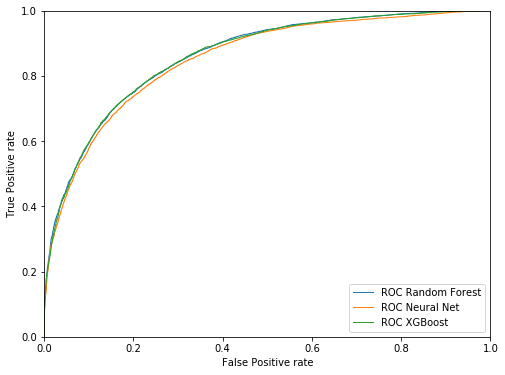

In [15]:
# Here we draw the ROC of our models and show their AUC. The reason why we use ROC/AUC as our 
# measurements of model performance is because the datasets are unbalanced skewing towards
# non-default observations. In this way, since in ROC, the fpr = FP/(FP+TN), while
# tpr = TP/(TP+FN). Since FP+TN = All Real Negative, and TP+FN = All Real Positive, therefore, 
# the relative unbalance between Real Positive and Real Negative will not influence the ROC/AUC 
# so much, in this perspective, the ROC/AUC is a relatively steady measurement to measure the 
# performance of our models. 

plt.figure(figsize=(8, 6))
for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
                       ('clf', clf)])
    pipe.fit(X_train, y_train)
    try:
        print("Algo: {0:<20s} and AUC Score: {1:0.4f}"
              .format(name, roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])))
        
        fpr,tpr,thresholds = roc_curve(y_test,pipe.predict_proba(X_test)[:,1])
        plt.plot(fpr,tpr,linewidth=1,label="ROC"+' '+name)
        plt.xlabel("False Positive rate")
        plt.ylabel("True Positive rate")
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.legend(loc=4)
    except: continue

plt.show()

In [31]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    fpr,tpr,thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
    
    print("Algo: {0:<20s} and AUC Score: {1:0.4f}".format(name, auc(fpr, tpr)))

Algo: Random Forest        and AUC Score: 0.8608
Algo: Neural Net           and AUC Score: 0.8496


### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    print(name)
    print(confusion_matrix(y_test, clf.predict(X_test)))
    print(' ')

Random Forest
[[8867 1389]
 [2143 4239]]
 
Neural Net
[[7811 2445]
 [1528 4854]]
 
XGBoost
[[8709 1547]
 [1970 4412]]
 


### Accuracy 

In [19]:
for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
                       ('clf', clf)])
    pipe.fit(X_train, y_train)
    print("Algo: {0:<20s} and Accuracy Score: {1:0.4f}".format(name, pipe.score(X_test, y_test)))

Algo: Random Forest        and Accuracy Score: 0.7880
Algo: Neural Net           and Accuracy Score: 0.7821
Algo: XGBoost              and Accuracy Score: 0.7887


### Running Time

In [23]:
import datetime

for name, clf in zip(names, classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
                       ('clf', clf)])
    last_time = datetime.datetime.now()
    pipe.fit(X_train, y_train)
    pipe.score(X_test, y_test)
    current_time = datetime.datetime.now()
    print("Algo: {0:<20s} and Running time：{1}s".format(name, (current_time-last_time).seconds))

Algo: Random Forest        and Running time：17s
Algo: Neural Net           and Running time：22s
Algo: XGBoost              and Running time：12s
